In [ ]:
1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Import the “world_university_ranking.csv” file
df_ranking = pd.read_csv(r'C:\Users\49157\Downloads\Data analysis course\Advanced analytics and dashboard designs\World University Rankings\Rankings_data_cleaned.csv', index_col = False)

In [ ]:
2. Data cleaning

In [4]:
df_ranking.columns

Index(['world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents',
       'score', 'year'],
      dtype='object')

In [5]:
df_ranking.head(20)

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,1.0,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,2.0,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,4.0,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,13.0,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,24.5,18,85.21,2012
5,6,Princeton University,USA,5,8,14,2,53,33,26,37.0,101,82.50,2012
6,7,University of Oxford,United Kingdom,2,13,28,9,15,13,19,10.5,26,82.34,2012
7,8,Yale University,USA,6,14,31,12,14,6,15,19.5,66,79.14,2012
8,9,Columbia University,USA,7,23,21,10,13,12,14,12.5,5,78.86,2012
9,10,"University of California, Berkeley",USA,8,16,52,6,6,5,3,7.0,16,78.55,2012


In [6]:
df_ranking.shape

(2199, 14)

In [8]:
# Check for missing values
df_ranking.isnull().sum()     ----- # No missing values

world_rank              0
institution             0
country                 0
national_rank           0
quality_of_education    0
alumni_employment       0
quality_of_faculty      0
publications            0
influence               0
citations               0
broad_impact            0
patents                 0
score                   0
year                    0
dtype: int64

In [9]:
# Check for duplicates
dups = df_ranking.duplicated()

In [10]:
dups.shape      -------- # No duplicated values found

(2199,)

C:\Users\49157\AppData\Local\Temp\ipykernel_24112\434781398.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_ranking['world_rank'], bins=25) # Shows extreme values


<Axes: xlabel='world_rank', ylabel='Density'>

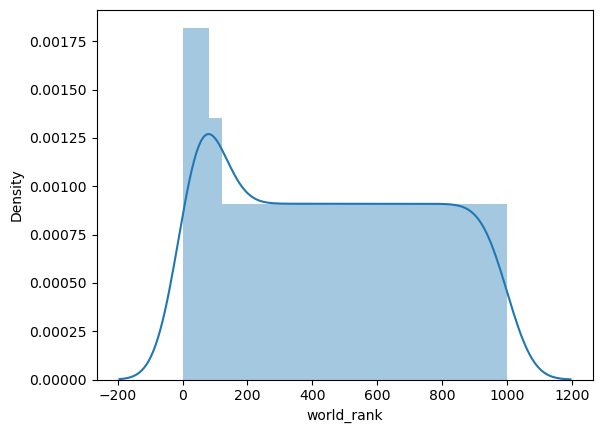

In [14]:
# Checking for extreme values
sns.distplot(df_ranking['world_rank'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [15]:
df_ranking['world_rank'].mean() # Check the mean

459.75670759436105

In [16]:
df_ranking['world_rank'].median() # Check the median

451.0

In [17]:
df_ranking['world_rank'].max() # Check the max

1000

In [ ]:
3. Data preparation for regression analysis

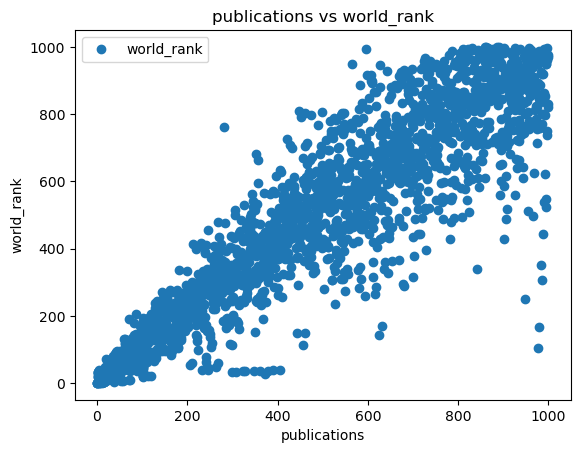

In [18]:
# Creating a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_ranking.plot(x = 'publications', y='world_rank',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('publications vs world_rank')  
plt.xlabel('publications')  
plt.ylabel('world_rank')  
plt.show()

# Hypothesis 1: Higher Number of Publications Leads to lower World Ranking. The scatter plot shows a clear trend where universities with more publications generally have lower world ranks (which is better since a lower rank indicates a higher position)

In [19]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_ranking['publications'].values.reshape(-1,1)
y = df_ranking['world_rank'].values.reshape(-1,1)

In [20]:
X

array([[  1],
       [ 12],
       [  4],
       ...,
       [830],
       [886],
       [861]], dtype=int64)

In [21]:
y

array([[   1],
       [   2],
       [   3],
       ...,
       [ 998],
       [ 999],
       [1000]], dtype=int64)

In [22]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
4. Regression analysis

In [23]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [25]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [26]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

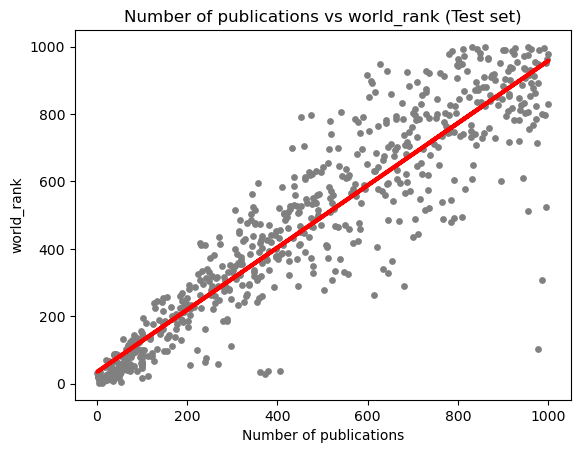

In [27]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Number of publications vs world_rank (Test set)')
plot_test.xlabel('Number of publications')
plot_test.ylabel('world_rank')
plot_test.show()

# The scatter plot reflects a positive correlation between the number of publications and the world rank of universities, with a clear linear trend. The red regression line indicates a strong linear relationship, especially for universities with lower world ranks (below 500). Most data points cluster closely around the line, which shows a good fit in this range. However, there is increased variability in the data points for universities with higher world ranks (above 500). Despite the general trend, the points are more spread out in this higher rank range. This suggests that while the number of publications is a significant predictor/factor of world rank, other factors might influence the rankings of universities with very few publications. In conclusion, the analysis confirms a strong linear relationship between publications and world rank.

In [28]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [29]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.92452385]]
Mean squared error:  13949.37370414321
R2 score:  0.8481446833679467


In [30]:
y_predicted

array([[818.45106571],
       [294.24604169],
       [145.39770154],
       [150.94484465],
       [486.54700289],
       [ 52.94531635],
       [511.50914689],
       [603.96153207],
       [861.90368675],
       [804.58320793],
       [187.92579873],
       [475.45271666],
       [345.09485355],
       [146.32222539],
       [791.63987401],
       [952.50702423],
       [629.84819993],
       [334.92509118],
       [744.48915756],
       [223.98222895],
       [346.94390125],
       [418.13223785],
       [291.47247014],
       [579.92391193],
       [800.88511252],
       [284.07627932],
       [358.03818747],
       [626.15010452],
       [637.24439074],
       [365.43437829],
       [493.01866985],
       [ 96.39793739],
       [126.9072245 ],
       [191.62389414],
       [516.13176615],
       [691.791298  ],
       [753.73439608],
       [669.60272556],
       [321.98175725],
       [519.82986155],
       [ 96.39793739],
       [168.51079784],
       [267.43484999],
       [765

In [31]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,982,818.451066
1,276,294.246042
2,83,145.397702
3,66,150.944845
4,499,486.547003
5,71,52.945316
6,550,511.509147
7,866,603.961532
8,601,861.903687
9,648,804.583208


# The model demonstrates a strong performance on the test set, as shown by the high R2 score of approximately 0.848, indicating that approximately 85%  of the variance in the world ranking can be explained by the number of publications. The MSE of 13949.37 suggests that the average squared difference between the actual and predicted values is relatively high, which might indicate some errors in prediction. Potential data bias may arise from an overemphasis on universities with more publications, affecting the model's applicability. On  the other hand, factors such as quality of education, quality of faculty, alumni employment, etc might also have an impact on the world rankings, but are not accounted for in this simple linear regression model. 

# Compare how the regression fits the training set

In [32]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [33]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [34]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.92452385]]
Mean squared error:  13602.971310321036
R2 score:  0.8534621175259534


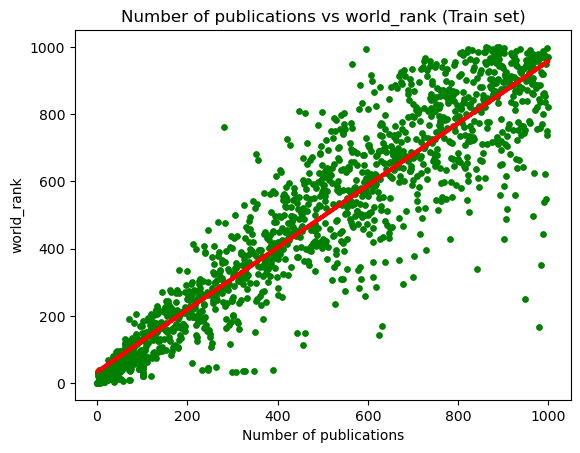

In [35]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Number of publications vs world_rank (Train set)')
plot_test.xlabel('Number of publications')
plot_test.ylabel('world_rank')
plot_test.show()

# The scatter plot depicts the relationship between the number of publications and world rank for the training set, with a fitted red regression line. The positive correlation indicates that universities with a higher number of publications tend to have a better (lower) world rank. The regression line fits the data well, which suggets a strong linear relationship. 